<a href="https://colab.research.google.com/github/21skar4/GNR-607-Assignment/blob/main/GNR607_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Guide to run the code**
[Github](https://github.com/21skar4/GNR-607-Assignment-Guide)

**Import libraries**

In [20]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy 
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from math import e
import time
import sys

**Loading the image**

In [21]:
# Load an color image in grayscale
inf = input("Enter path of local input " )



Enter path of local input /content/linear.jpg


In [22]:
image = cv2.imread(inf,0)
print(image)

[[171 171 171 ... 120 141 147]
 [171 171 171 ... 104 127 135]
 [172 172 172 ...  91 116 128]
 ...
 [135 122 113 ... 123 139 149]
 [142 129 120 ... 121 141 156]
 [156 143 134 ... 135 160 182]]


**Histogram of frequency of grey level**

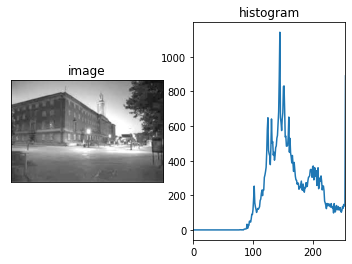

In [23]:
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('image')
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
hist,bin = np.histogram(image.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram')
plt.show()

**Plotting a histogram**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


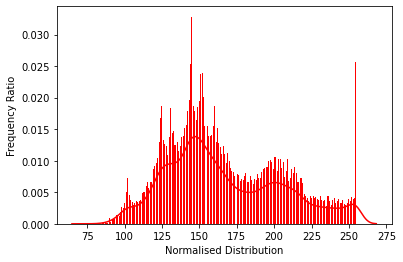

In [24]:
# plotting a histogram
ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normalised Distribution', ylabel='Frequency Ratio')
 
plt.show()

**Max and min grey level** 

In [25]:
max_grey_level=numpy.max(image)
min_grey_level=numpy.min(image)
print("Max_grey_level :",max_grey_level,"      Min_grey_level :",min_grey_level)

Max_grey_level : 255       Min_grey_level : 78


In [26]:
rows,columns=image.shape
print("Rows : ",rows,"Columns : ",columns)



Rows :  183 Columns :  275


**Display the image**

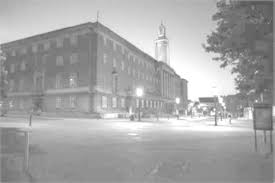

In [27]:
#Display the image
cv2_imshow(image)



**Linear contrast enhancement**

**Linear Contrast Enchancement with original max and min grey level**


*Not suitable when there is a remote pixel with very less frequency of occurance.*



In [28]:
def lin_con_enhan1(image,max_desired,min_desired):
  # plotting normal distribution for image
  ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution Old Image', ylabel='Frequency Ratio')
  plt.show()
  # max and min gery level
  max_grey_level=numpy.max(image)
  min_grey_level=numpy.min(image)
  print("Max_grey_level :",max_grey_level,"     Min_grey_level :",min_grey_level)
  #rows and columns of the pixels in the image
  rows,columns=image.shape
  # m is a slope in the linear contrast enchancement,ie, it represents how much the image is stretched
  m=(max_desired-min_desired)/(max_grey_level-min_grey_level)
  # newimage is an empty list to store the contrast enchnaced image
  newimage=np.zeros((rows,columns),dtype = 'uint8')
  #the enchancement
  for i in range(0,rows):
    for j in range(0,columns):
      newimage[i,j]= m*(image[i,j]-min_grey_level) + min_desired
  # plotting normal distribution for newimage 
  ax = sns.distplot(newimage.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution New Image', ylabel='Frequency Ratio')
  plt.show()
  print("m ",m)
  #printing newimage data
  print("New Image data ",newimage)
  #displaying the initial image
  cv2_imshow(image)
  print("Initial Image")
  #displaying the new image
  cv2_imshow(newimage)
  print("New Image")
  return


**Liner Contrast Enhancement2**
**Linear contrast enhancement with maximum and minimum being taken at a distance of K x standard deviation from the mean grey level**

In [29]:
def lin_con_enhan2(image,k,max_desired,min_desired):
  # plotting normal distribution for image
  ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution Old Image', ylabel='Frequency Ratio')
  plt.show()
  # max and min gery level
  mean_grey_level=numpy.mean(image) 
  print("Mean grey Level",mean_grey_level)
  standard_deviation=numpy.std(image)
  print("standard_deviation ",standard_deviation)
  max_grey_level=mean_grey_level + k*standard_deviation
  min_grey_level=mean_grey_level - k*standard_deviation
  if  max_grey_level <= max_desired:
    max_grey_level = max_grey_level
  else:
    max_grey_level = max_desired
  if min_desired <= min_grey_level:
    min_grey_level = min_grey_level
  else:
    min_grey_level = min_desired

  print("Max_grey_level :",max_grey_level,"     Min_grey_level :",min_grey_level)
  #rows and columns of the pixels in the image
  rows,columns=image.shape
  # m is a slope in the linear contrast enchancement,ie, it represents how much the image is stretched
  m=(max_desired-min_desired)/(max_grey_level-min_grey_level)
  # newimage is an empty list to store the contrast enchnaced image
  newimage=np.zeros((rows,columns),dtype = 'uint8')
  #the enchancement
  for i in range(0,rows):
    for j in range(0,columns):
      newimage[i,j]= m*abs(image[i,j]-min_grey_level) + min_desired
      if newimage[i,j] <= min_desired:
        newimage[i,j] = min_desired
      if max_desired <= newimage[i,j]:
        newimage = max_desired
      else:
        newimage[i,j] = newimage[i,j]
  # plotting normal distribution for newimage 
  ax = sns.distplot(newimage.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution New Image', ylabel='Frequency Ratio')
  plt.show()
  print("m ",m)
  #printing newimage data
  print("New Image data ",newimage)
  #displaying the initial image
  cv2_imshow(image)
  print("Initial Image")
  #displaying the new image
  cv2_imshow(newimage)
  print("New Image")
  return


**We should take k value shuch that most of the pixels are within min and max value**

**Log contrast enchancement**

In [30]:
def log_con_enhan(image,k,max_desired,min_desired):
  # plotting normal distribution for image
  ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution Old Image', ylabel='Frequency Ratio')
  plt.show()
  # max and min grey level
  max_grey_level=numpy.max(image)
  min_grey_level=numpy.min(image)
  print("Max_grey_level :",max_grey_level,"     Min_grey_level :",min_grey_level)
  #rows and columns of the pixels in the image
  rows,columns=image.shape

  # newimage is an empty list to store the contrast enchnaced image
  newimage=np.zeros((rows,columns),dtype = 'uint8')
  
  #the enchancement
  for i in range(0,rows):
    for j in range(0,columns):
      newimage[i,j]= (max_desired-min_desired)/numpy.log(1+(max_grey_level/k))*numpy.log(1+(image[i,j]/k))+min_desired
  # plotting normal distribution for newimage 
  ax = sns.distplot(newimage.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution New Image', ylabel='Frequency Ratio')
  plt.show()
  #printing newimage data
  print("New Image data ",newimage)
  #displaying the initial image
  cv2_imshow(image)
  print("Initial Image")
  #displaying the new image
  cv2_imshow(newimage)
  print("New Image")
  return

**Exponential contrast enhancement**

In [31]:
def exp_con_enhan(image,k,max_desired,min_desired):
  # plotting normal distribution for image
  ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution Old Image', ylabel='Frequency Ratio')
  plt.show()
  # max and min gery level
  max_grey_level=numpy.max(image)
  min_grey_level=numpy.min(image)
  print("Max_grey_level :",max_grey_level,"     Min_grey_level :",min_grey_level)
  #rows and columns of the pixels in the image
  rows,columns=image.shape

  # newimage is an empty list to store the contrast enchnaced image
  newimage=np.zeros((rows,columns),dtype = 'uint8')
  
  #the enchancement
  for i in range(0,rows):
    for j in range(0,columns):
      newimage[i,j]= ((max_desired-min_desired)/((np.power(e,(max_grey_level/k)))-1))*((np.power(e,(image[i,j]/k)))-1)+min_desired
  # plotting normal distribution for newimage 
  ax = sns.distplot(newimage.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution New Image', ylabel='Frequency Ratio')
  plt.show()
  #printing newimage data
  print("New Image data ",newimage)
  #displaying the initial image
  cv2_imshow(image)
  print("Initial Image")
  #displaying the new image
  cv2_imshow(newimage)
  print("New Image")
  return

In [32]:
print("Type 1 : For Linear Contrast Enhancement 1")
print("Type 2 : For Linear Contrast Enhancement 2")
print("Type 3 : For Log Contrast Enhancement ")
print("Type 4 : For Exponentail Contrast Enhancement ")
print(" ")
print("You have chosen ")
val = int(input())
if val != 1 and val != 2 and val != 3 and val != 4:
  print("You have chosen a wrong value ")
  sys. exit()
print(" ")
print("Choose max desired greylevel between 0 and 255 ")
max_desired = int(input())
if 0 <= max_desired <= 255:
  print("")
else:
  print("You have entered a wrong value")
  sys. exit()
print("Choose min desired greylevel between 0 and 255 ")
min_desired = int(input())
if 0 <= min_desired <= 255:
  print(" ")
else:
  print("You have entered a wrong value")
  sys. exit()


Type 1 : For Linear Contrast Enhancement 1
Type 2 : For Linear Contrast Enhancement 2
Type 3 : For Log Contrast Enhancement 
Type 4 : For Exponentail Contrast Enhancement 
 
You have chosen 
1
 
Choose max desired greylevel between 0 and 255 
255

Choose min desired greylevel between 0 and 255 
0
 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


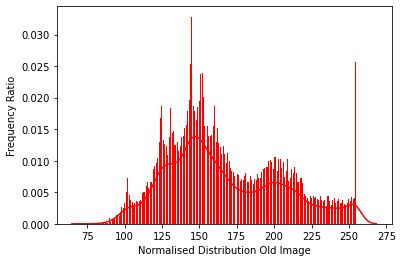

Max_grey_level : 255      Min_grey_level : 78


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


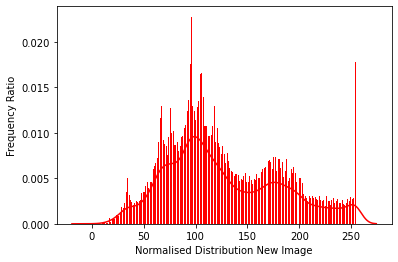

m  1.4406779661016949
New Image data  [[133 133 133 ...  60  90  99]
 [133 133 133 ...  37  70  82]
 [135 135 135 ...  18  54  72]
 ...
 [ 82  63  50 ...  64  87 102]
 [ 92  73  60 ...  61  90 112]
 [112  93  80 ...  82 118 149]]


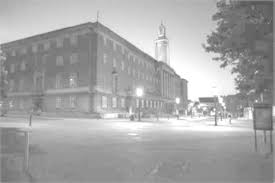

Initial Image


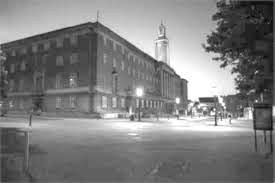

New Image


In [33]:

if val == 1:
  lin_con_enhan1(image,max_desired,min_desired)
if val == 2:
  lin_con_enhan2(image,8,max_desired,min_desired)

if val == 3:
  print("Choose value between 5-500 for k")
  k1 = int(input())
  if 5 <= k1 <= 500:
    print(" ")
  else:
     print("You have entered a wrong value")
     sys. exit()
  log_con_enhan(image,k1,max_desired,min_desired)

if val == 4:
  print("Choose value between 50 -500 for k")
  k2 = int(input())
  if 50 <= k2 <= 1000:
    print(" ")
  else:
     print("You have entered a wrong value")
     sys. exit()

  exp_con_enhan(image,k2,max_desired,min_desired)
 
